In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_data.csv")

In [ ]:
y = pd.read_csv("/content/pha_map.csv")

In [ ]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
from imblearn.over_sampling import SVMSMOTE

In [ ]:
!pip install dask

In [ ]:
!python -m pip install dask distributed --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2023.8.1
    Uninstalling dask-2023.8.1:
      Successfully uninstalled dask-2023.8.1
  Attempting uninstall: distributed
    Found existing installation: distributed 2023.8.1
    Uninstalling distributed-2023.8.1:
      Successfully uninstalled distributed-2023.8.1


In [ ]:
import os
os.cpu_count()

2

In [ ]:
from dask.distributed import Client
client = Client(n_workers=2)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44309
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45329'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44503'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42307', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42307
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39252
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34997', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker co

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44309,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:34997,Total threads: 1
Dashboard: http://127.0.0.1:41565/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:45329,


In [ ]:
import joblib

In [ ]:
svm = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svm.fit_resample(X, y)

INFO:distributed.core:Event loop was unresponsive in Nanny for 4.15s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 4.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 4.16s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
y_resampled.value_counts()

pha
0      1309593
1      1309593
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1      1048325
0      1047023
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262570
1      261268
Name: count, dtype: int64

In [ ]:
y_train = y_train.squeeze()
y_train

1205167    0
575514     0
1212305    0
1847891    1
1411332    1
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095348, dtype: int64

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9991619546501017

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262229,    341],
       [    98, 261170]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9991631024639278

In [ ]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}

rand5 = RandomizedSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand5.fit(X_train,y_train)

INFO:distributed.scheduler:Receive client connection: Client-worker-c686ec09-3f9a-11ef-ac19-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34232
INFO:distributed.scheduler:Receive client connection: Client-worker-c68740fa-3f9a-11ef-abf2-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34236
INFO:distributed.scheduler:Receive client connection: Client-worker-c6874526-3f9a-11ef-abcf-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34244
INFO:distributed.scheduler:Receive client connection: Client-worker-c6898e2a-3f9a-11ef-ac21-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34256
INFO:distributed.scheduler:Receive client connection: Client-worker-c68d2fa2-3f9a-11ef-abc1-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:34258
INFO:distributed.scheduler:Receive client connection: Client-worker-c68eae8a-3f9

KeyboardInterrupt: 

In [ ]:
rand5.best_params_

{'n_estimators': 500, 'learning_rate': 1}

In [ ]:
rand5.best_score_

0.9994416201963711

In [ ]:
##Training with best parameters
adabest = AdaBoostClassifier(n_estimators=500, learning_rate=1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    adabest.fit(X_train,y_train)

y_pred = adabest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262570
          1       1.00      1.00      1.00      1.00      1.00      1.00    261268

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523838



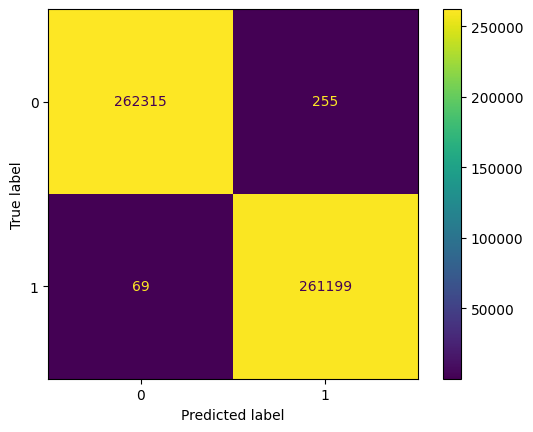

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=adabest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adabest.classes_)
disp.plot()
plt.show()

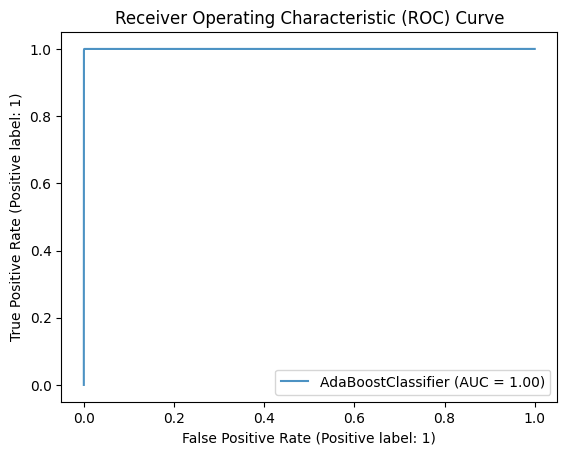

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(adabest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99902883, 0.9997359 ]), array([0.9997359 , 0.99902883]), array([262570, 261268]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9993823668853627, 0.9993823668853627, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9993814881700067, 0.9993814881700067, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9993814881700067, 0.9993832456007188, None)
